In [2]:
import pandas as pd
import numpy as np
from top2vec import Top2Vec

/Users/KeshavSompura1/opt/anaconda3/envs/env_topic/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# read in csv file of scraped reviews
app_reviews = pd.read_csv('data/app_reviews.csv')

# convert into dataframe
app_df = pd.DataFrame(app_reviews)

# drop unnessesary colummns 
clean_df = app_df.drop(['replyContent',
                        'repliedAt',
                        'userName',
                        'userImage',
                        'reviewCreatedVersion',
                        'sortOrder'
                       ], axis = 1, inplace = False)

In [3]:
# topic modeling with top2vec - use google's USE (universal-sentence-encoder), could be interesting if used BERT instead
#documents = clean_df.content.values.tolist()
documents = clean_df.copy()


documents['content'] = documents['content'].astype(str)
docs = documents['content'].to_numpy()

In [4]:
type(docs)
docs[0]

"Horrible experience. You have to spend all the time hunting down what you want and then you lose it every 1 to 4 hours. Finally get to place your orders and the stuff never comes! Just an oops, sorry. First issue, took like 3 weeks for an order to get here, second time, lost the whole order, this time, missing item that I wanted most in order. But new, you may not get what you order and then they'll just resell it and call it a day. Horrible company and horrible experience multiple times."

In [5]:
model = Top2Vec(docs)

2023-02-07 20:46:39,422 - top2vec - INFO - Pre-processing documents for training
2023-02-07 20:46:47,288 - top2vec - INFO - Creating joint document/word embedding
2023-02-07 20:51:27,168 - top2vec - INFO - Creating lower dimension embedding of documents
2023-02-07 20:53:13,332 - top2vec - INFO - Finding dense areas of documents
2023-02-07 20:53:21,278 - top2vec - INFO - Finding topics


In [3]:
# save the Top2Vec topic model (Doc2Vec embedding)
# model.save("model_app_topics")

# load the model
model = Top2Vec.load("model_app_topics")

In [4]:
# number of topics
model.get_num_topics()

# topic size
topic_sizes, topic_nums = model.get_topic_sizes()

print(topic_sizes)


[1235 1100 1043 ...   20   20   16]


In [16]:

topic_words, word_scores, topic_nums = model.get_topics(77)

topic_words


array([['super', 'app', 'etc', ..., 'frustrating', 'ready', 'default'],
       ['easy', 'simple', 'use', ..., 'gr', 'speedy', 'fab'],
       ['bless', 'comfort', 'finds', ..., 'beat', 'awesome', 'versus'],
       ...,
       ['cool', 'es', 'gr', ..., 'livraison', 'struggling', 'le'],
       ['far', 'pleased', 'die', ..., 'highly', 'promptly', 'bargains'],
       ['english', 'language', 'french', ..., 'bloody', 'intuitive',
        'exit']], dtype='<U15')

In [13]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=999, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()
    
# topic 501 interesting



Document: 17070, Score: 0.8653609156608582
-----------
Only problem is I wish I could be more specific on the price filter
-----------

Document: 13283, Score: 0.8649255037307739
-----------
I only wish I could search for something specific but otherwise it's great!
-----------

Document: 42722, Score: 0.8634027242660522
-----------
Amazing! Easy to find specific items!
-----------

Document: 21308, Score: 0.853033185005188
-----------
Very easy to filter for your specific needs!
-----------

Document: 13046, Score: 0.8476812839508057
-----------
I love it. Only issue is I wish the search feature was less brand specific, 
and more style specific.
-----------



In [23]:
# plot using umap
vectors = model.document_vectors



In [24]:
import umap

In [25]:
reducer = umap.UMAP()

reduced2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', verbose=True).fit_transform(vectors)

UMAP(angular_rp_forest=True, metric='cosine', verbose=True)
Tue Feb  7 22:41:08 2023 Construct fuzzy simplicial set
Tue Feb  7 22:41:08 2023 Finding Nearest Neighbors
Tue Feb  7 22:41:08 2023 Building RP forest with 28 trees
Tue Feb  7 22:41:10 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	Stopping threshold met -- exiting after 6 iterations
Tue Feb  7 22:41:24 2023 Finished Nearest Neighbor Search
Tue Feb  7 22:41:26 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:37]


Tue Feb  7 22:42:49 2023 Finished embedding


In [26]:
import matplotlib.pyplot as plt

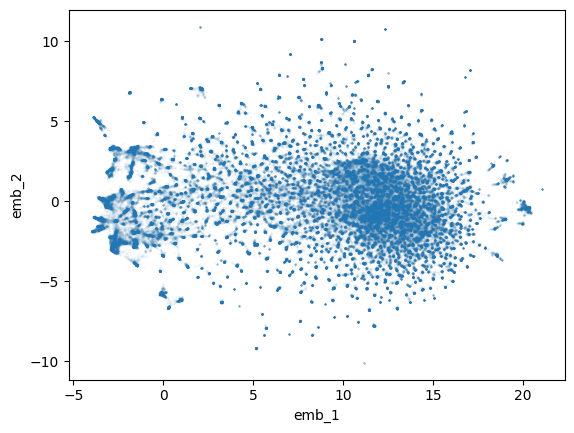

In [71]:
fig, axes = plt.subplots()
plt.scatter(
    reduced2d[:, 0],
    reduced2d[:, 1],
    s=0.1,
    alpha = 0.1
)
plt.xlabel('emb_1')
plt.ylabel('emb_2')

fig.savefig('topic_emb.png')

In [16]:
#topics_reduced = model.hierarchical_topic_reduction(num_topics=12)

In [17]:
#model.save("model_reduced_reviews")

In [20]:
type(topics_reduced)

list

In [21]:
# write list into text file for ease of later use
# with open('topics_reduced.txt', 'w') as f:
#     for line in topics_reduced:
#         f.write(f"{line}\n")

In [50]:
# make a dataframe with embedding 1, embedding 2, and label columns
df = pd.DataFrame(reduced2d, columns = ['emb_1','emb_2'])

# attach topic to each document/ observation
mod_2 = model.doc_top_reduced

df['topic'] = mod_2

df['topic'] = df['topic'].astype('category')

In [72]:
df.topic.info # 12 total topics

<bound method Series.info of 0          1
1          2
2          4
3          2
4          3
          ..
212250     7
212251    11
212252    11
212253    11
212254     7
Name: topic, Length: 212255, dtype: category
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]>

In [47]:
import seaborn as sns

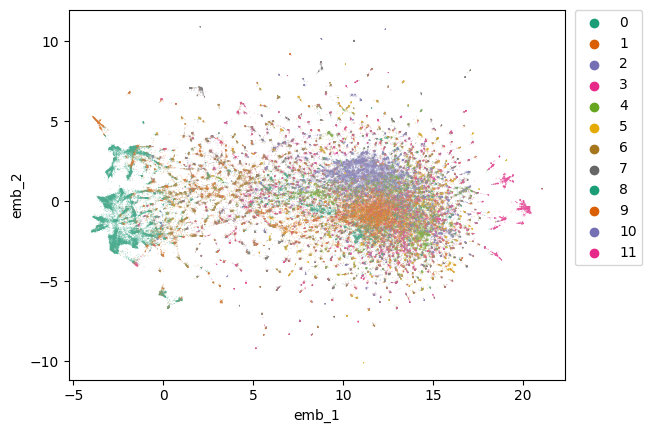

In [69]:
fig, axes = plt.subplots()

sns.scatterplot(data=df, x="emb_1", y="emb_2",
            hue="topic",
            s = 0.4,
            alpha = 0.4,
            palette = 'Dark2')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# fig.savefig('topic_clusters.png')

In [ ]:
### ways to improve - 
# word cloud of the 12 topics
# use universal sentence encoderor BERT for encoding 
# apply deep-learn when learning the model